## Programming Assignment 5
#### In this assignment, you will be implementing Tomasi-Kanade	Factorization algorithm	for Rigid Structure from Motion.

### Task 1
#### Load the data file and generate a 2D image dataset	by generating an orthographic camera with optical axis paralle to the XY plane, which rotates around the teapot	in 10° increments and always looks towards the center of the object
#### Note: Code for loading the point cloud and visualizing it has been given to you. Further build on it and take images of the teapot and visualize them

In [7]:
from scipy.io import loadmat
import numpy as np
import math
x = loadmat('teapot.mat')

In [2]:
a = []
b = []
c = []
for points in x['verts']:
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])

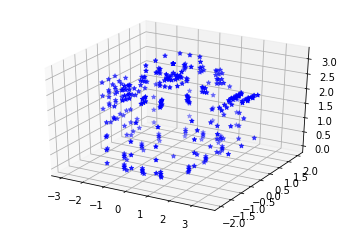

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,c, c='b', marker='*')

In [55]:
### Your implementation comes here

#rotate cloudmesh points along xy plane
#takes original object cloud mesh and rotation angle in radians. 

def rotatepoints(cloudmesh, radianangle):
    xpoints, ypoints, zpoints = [], [], []
    
    for points in cloudmesh['verts']:
        xpoints.append(points[0] * math.cos(radianangle) + points[1] * math.sin(radianangle))
        ypoints.append(points[1] * math.cos(radianangle) - points[0] * math.sin(radianangle) )
        zpoints.append(points[2])
        
    return xpoints, ypoints, zpoints

In [58]:
newA, newB, newC = rotatepoints(x, .61)

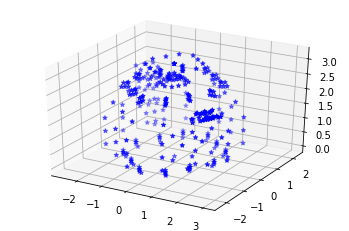

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newA,newB,newC, c='b', marker='*')

### Task 2
#### Use the data generated in previous task to generate a W matrix, and use that as input in Tomasi Kanade Factorization method to compute the 3D structure

In [5]:
### Your implementation comes here
image1 = np.array([[a], [b], [c]])
image2 = np.array([[newA], [newB], [newC]])

#https://www.youtube.com/watch?v=eFuQ_ZlTyN0

In [ ]:
def form_Wmatrix(img1, img2):
    return np.vstack((img1, img2))

def tomasi_kanade(W):
    u, s, v = np.linalg.svd(W)
    
    u = u[:, 0:3] #2m x 3
    s = s[0:3]    #3 x 3
    v = v[0:3, :]  #3 X n
    
    motion_matrix = u * s
    shape_matrix = v
    
    
    #apply euclidean geometry corrections
    
    return motion_matrix, shape_matrix

### Task 3
#### Use some error metric to determine the error between actual and calculated values

In [6]:
### Your implementation comes here

def error(actual, calculated):
    mean = np.mean(calculated, axis=0, keepdims=True)
    err = actual - mean
    return err
    
#mean error can be used to find error between values

### Task 4 
#### Suggest a modification to this method or another existing alogirithm. Also explain the situations under which this algorithm might fail

#### Your answer comes here

Affine transformation and correction can used to minimize error in determining motion and shape matrix. Given these transformations, we will have better results as we will have transformations that relate one image to another. Hence, by relation in source images, we can even stack overlapping parts and reduce error in those parts.

If there's high value of noise in images, this algo may fail to produce good results.
This algo works only on orthographic images, if images have perspective distortion, this algo will fail.